In [1]:
import os
import sys

import numpy as np
import torch

notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from sceneinformer.dataset.dataset import VectorizedDatasetHDF5
from sceneinformer.utils.utils import my_collate, set_seed
from sceneinformer.utils.visualization_utils import generate_visualization

## Fully Observable Trajectory Prediction

Random seed set as 5
Loading the dataset from /home/benksy/Projects/SceneInformer/occlusion_dataset/training.
Loaded 8 samples.


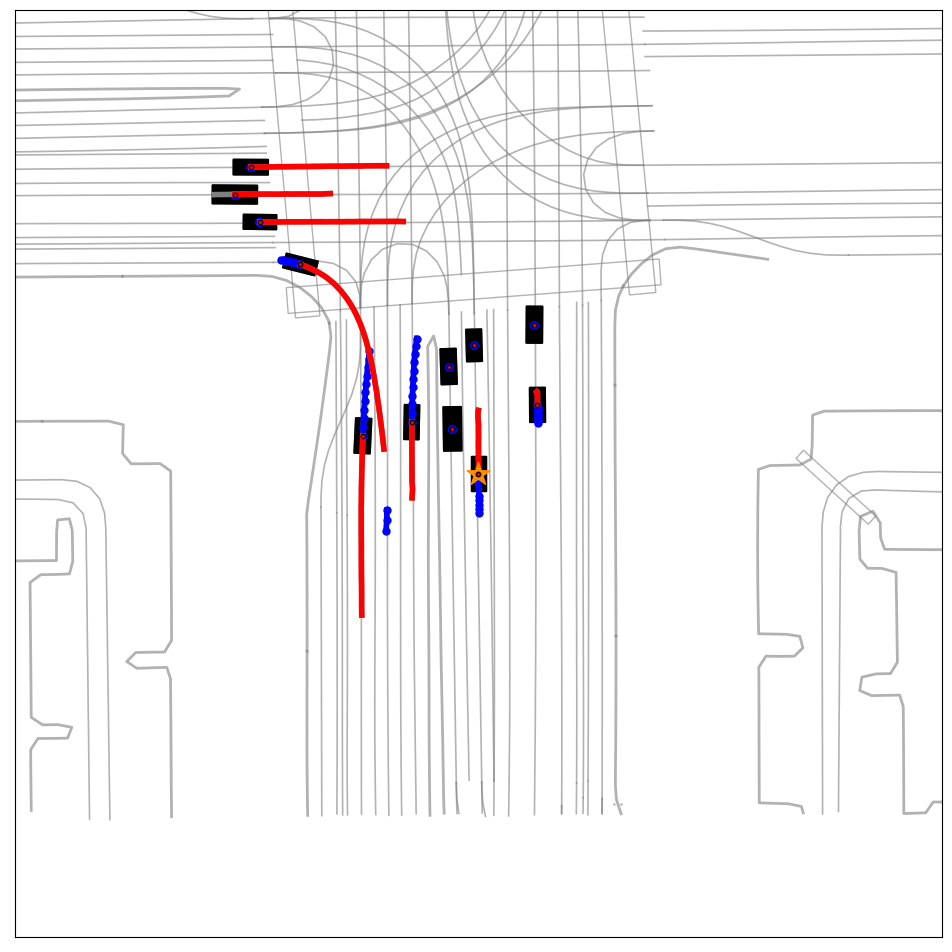

In [6]:
data_configs = {}

full_visibility = True
prob_occluding_object = 0.0
occlusion_inf = False
dataset_path = '/home/benksy/Projects/SceneInformer/occlusion_dataset'

configs = {}
data_configs = {}
data_configs['dataset'] = 'waymo'
data_configs['t_past'] = 11
data_configs['t_future'] = 40
data_configs['full_obs'] = full_visibility
data_configs['occlusion_inf'] = occlusion_inf
data_configs['prob_occluding_object'] = prob_occluding_object
data_configs['path'] = '/home/benksy/Projects/SceneInformer/occlusion_dataset' #'/media/benksy/Storage_SSD_2TB/Datasets/WaymoMotion_1_2_0_occlusions/validation'
data_configs['mode'] = 'training'
data_configs['batch_size'] = 1
data_configs['debug'] = True
data_configs['prob_occupied_occlusion'] = 0.5
data_configs['dataset_summary'] = 'dataset_summary'

set_seed(5)

dataset = VectorizedDatasetHDF5(data_configs) 
sample = dataset.get_scene_frame(scene=0, sample=0,t=30, object_id_perspective=14, occlusion_idx=0)
generate_visualization(sample, None, save=False, plot_future=True)

## Occlusion Inference with a Single Occlusion (Full Obs. Occlusion inference setting)
This setting was used for training the model in the paper. Grey color indicates occlusion.

Random seed set as 5
Loading the dataset from /home/benksy/Projects/SceneInformer/occlusion_dataset/training.
Loaded 8 samples.


/home/benksy/Projects/SceneInformer/sceneinformer/utils/visualization_utils.py:250: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(Polygon(single_polygon, color='grey', edgecolor='black', alpha=0.5, fill=True, zorder=-10))


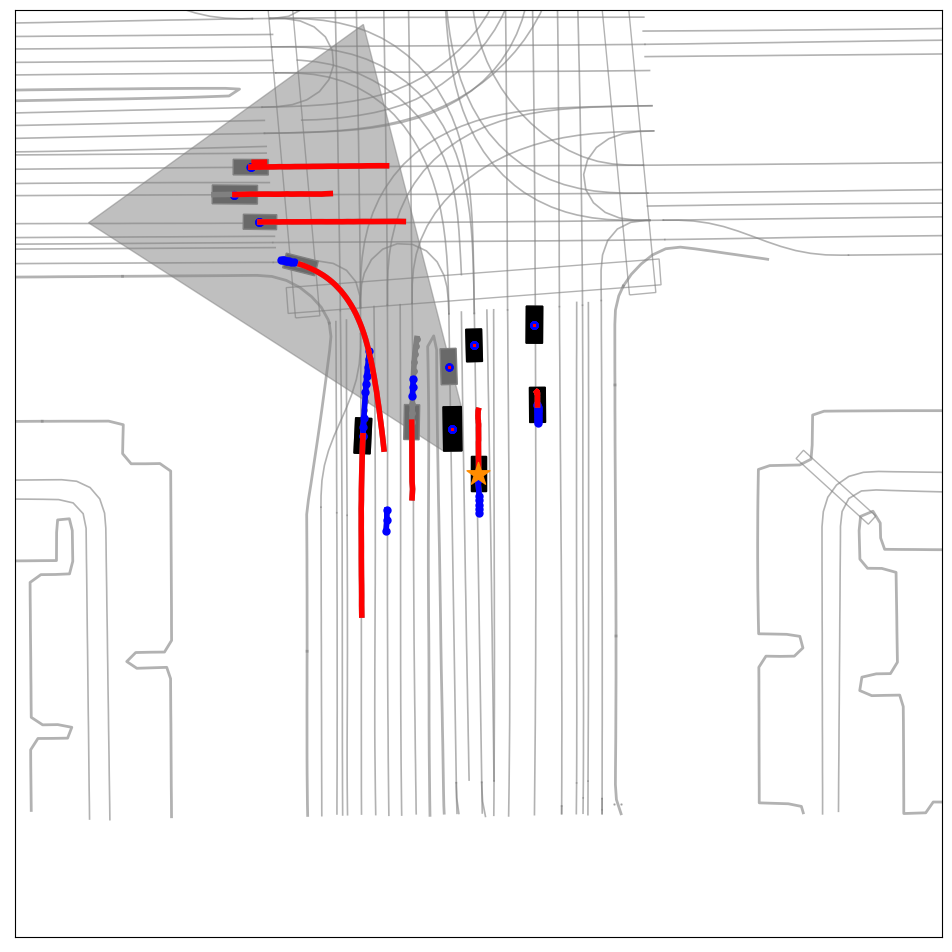

In [8]:

data_configs = {}

full_visibility = True
prob_occluding_object = 1.0
occlusion_inf = True
dataset_path = '/home/benksy/Projects/SceneInformer/occlusion_dataset'

configs = {}
data_configs = {}
data_configs['dataset'] = 'waymo'
data_configs['t_past'] = 11
data_configs['t_future'] = 40
data_configs['full_obs'] = full_visibility
data_configs['occlusion_inf'] = occlusion_inf
data_configs['prob_occluding_object'] = prob_occluding_object
data_configs['path'] = '/home/benksy/Projects/SceneInformer/occlusion_dataset' #'/media/benksy/Storage_SSD_2TB/Datasets/WaymoMotion_1_2_0_occlusions/validation'
data_configs['mode'] = 'training'
data_configs['batch_size'] = 1
data_configs['debug'] = True
data_configs['prob_occupied_occlusion'] = 0.5
data_configs['dataset_summary'] = 'dataset_summary'

set_seed(5)

dataset = VectorizedDatasetHDF5(data_configs) 
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2, collate_fn=my_collate, pin_memory=False, persistent_workers=True)   

sample = dataset.get_scene_frame(scene=0, sample=0,t=30, object_id_perspective=14, occlusion_idx=0)
generate_visualization(sample, None, save=False, plot_future=True, just_polygon=True)

## Many Occlusions
Visualization with many polygons is only available in the debug mode. This setting was used for evaluation the model in the paper. Grey color indicates occlusion.

Random seed set as 5
Loading the dataset from /home/benksy/Projects/SceneInformer/occlusion_dataset/training.
Loaded 8 samples.


/home/benksy/Projects/SceneInformer/sceneinformer/utils/visualization_utils.py:250: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(Polygon(single_polygon, color='grey', edgecolor='black', alpha=0.5, fill=True, zorder=-10))


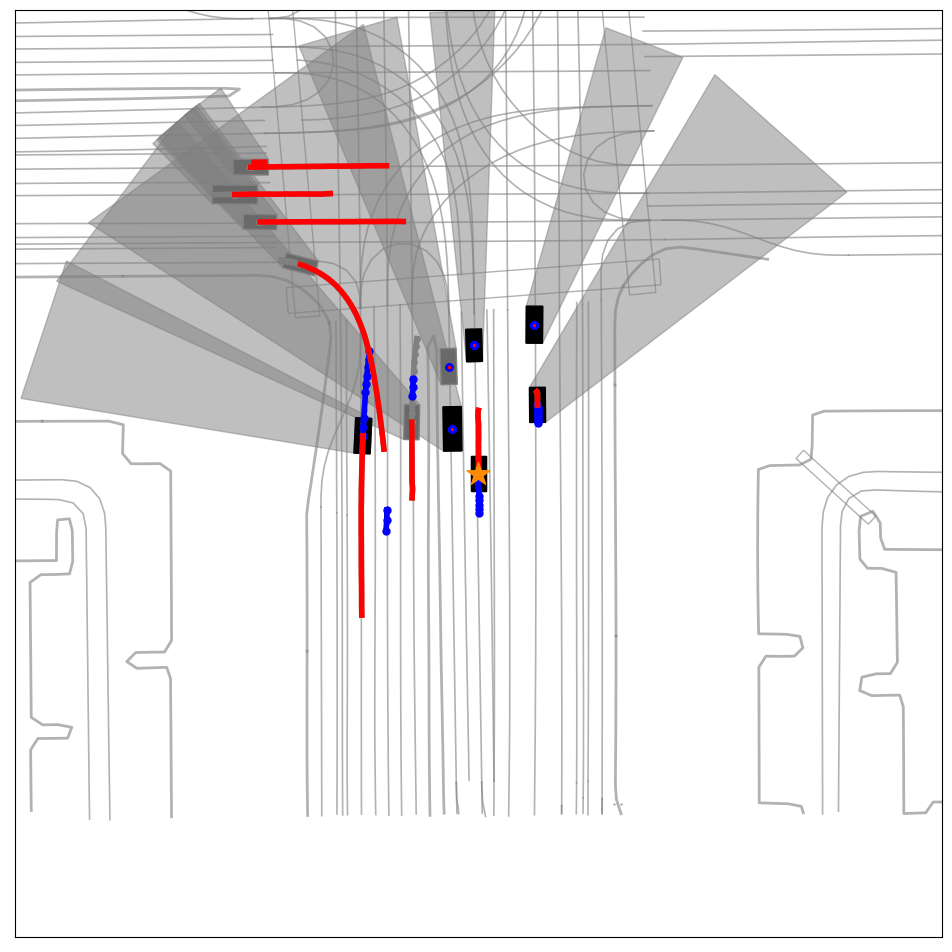

In [9]:
data_configs = {}

full_visibility = False
prob_occluding_object = 1.0
occlusion_inf = True
dataset_path = '/home/benksy/Projects/SceneInformer/occlusion_dataset'

configs = {}
data_configs = {}
data_configs['dataset'] = 'waymo'
data_configs['t_past'] = 11
data_configs['t_future'] = 40
data_configs['full_obs'] = full_visibility
data_configs['occlusion_inf'] = occlusion_inf
data_configs['prob_occluding_object'] = prob_occluding_object
data_configs['path'] = '/home/benksy/Projects/SceneInformer/occlusion_dataset' #'/media/benksy/Storage_SSD_2TB/Datasets/WaymoMotion_1_2_0_occlusions/validation'
data_configs['mode'] = 'training'
data_configs['batch_size'] = 1
data_configs['debug'] = True
data_configs['prob_occupied_occlusion'] = 0.5
data_configs['dataset_summary'] = 'dataset_summary'

set_seed(5)

dataset = VectorizedDatasetHDF5(data_configs) 
sample = dataset.get_scene_frame(scene=0, sample=0,t=30, object_id_perspective=14, occlusion_idx=0)
generate_visualization(sample, None, save=False, plot_future=True, just_polygon=True)